In this notebook will be written algorithm for planning. Firstly A* will be implemented and after it ADA*


# Load and visualize the map

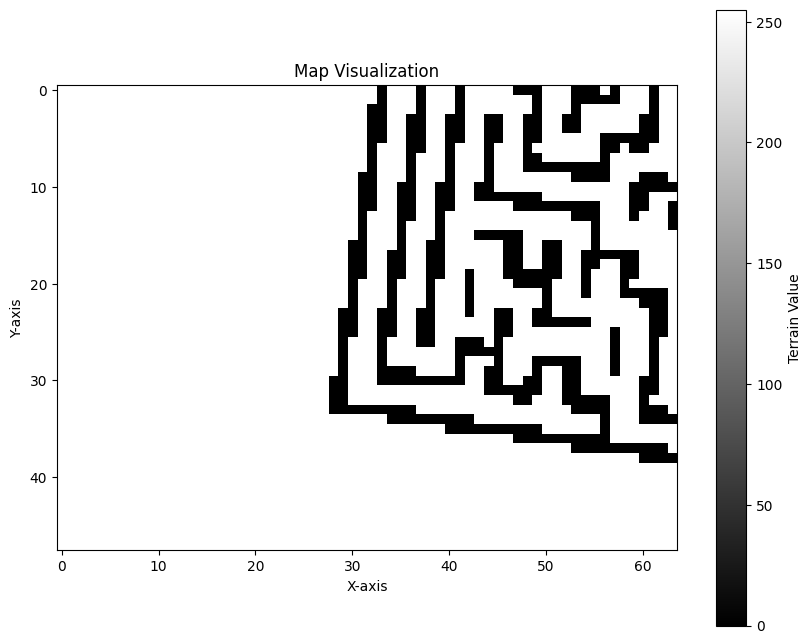

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the map data
file_path = './mp23(2).csv'
map_data = pd.read_csv(file_path, header=None)
map_data = map_data[1:]
# Convert to a NumPy array for easier handling
map_array = map_data.values

# Visualize the map
plt.figure(figsize=(10, 8))
plt.imshow(map_array, cmap='gray', origin='upper')
plt.colorbar(label="Terrain Value")
plt.title("Map Visualization")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()


# A* with and without heueristic


Comparison of A* with and without heuristic:
------------------------------------------------
With Heuristic:
Total Nodes Explored: 365
Path Length: 46
Execution Time (seconds): 0.0022525787353515625
Efficiency (Path Length / Explored Nodes): 0.12602739726027398

Without Heuristic:
Total Nodes Explored: 441
Path Length: 46
Execution Time (seconds): 0.0020673274993896484
Efficiency (Path Length / Explored Nodes): 0.10430839002267574


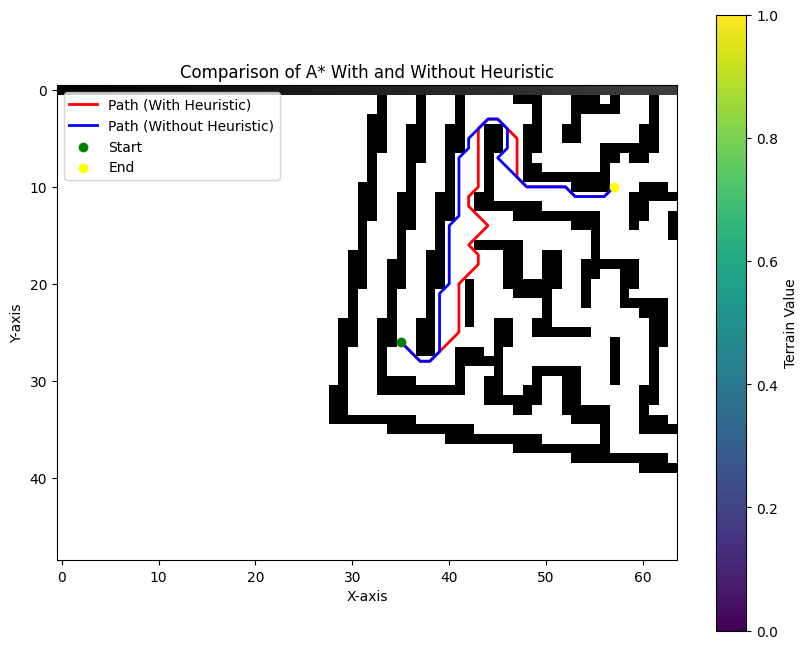

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from heapq import heappop, heappush
import time

class AStarPlanner:
    def __init__(self, map_array, start_pos, end_pos, use_heuristic=True):
        self.map = map_array
        self.start = start_pos
        self.end = end_pos
        self.rows, self.cols = map_array.shape
        self.directions = [(0, 1), (1, 0), (0, -1), (-1, 0), 
                           (1, 1), (-1, -1), (1, -1), (-1, 1)]  # Allow diagonal movement
        self.use_heuristic = use_heuristic

    def heuristic(self, a, b):
        """Calculate Manhattan distance heuristic."""
        if self.use_heuristic:
            return abs(a[0] - b[0]) + abs(a[1] - b[1])
        return 0  # No heuristic

    def is_within_bounds(self, pos):
        """Check if the position is within the map boundaries."""
        return 0 <= pos[0] < self.rows and 0 <= pos[1] < self.cols

    def is_passable(self, pos):
        """Check if the position is passable."""
        return self.map[pos[0], pos[1]] == 255  # Free space is 255

    def find_path(self):
        """Run the A* or Dijkstra's algorithm."""
        open_set = []
        heappush(open_set, (0, self.start))
        came_from = {}
        g_score = {self.start: 0}
        f_score = {self.start: self.heuristic(self.start, self.end)}
        visited = set()

        start_time = time.time()

        while open_set:
            _, current = heappop(open_set)
            visited.add(current)

            if current == self.end:
                end_time = time.time()
                path = self.reconstruct_path(came_from, current)
                stats = {
                    "Total Nodes Explored": len(visited),
                    "Path Length": len(path),
                    "Execution Time (seconds)": end_time - start_time,
                    "Efficiency (Path Length / Explored Nodes)": len(path) / len(visited)
                }
                return path, stats

            for direction in self.directions:
                neighbor = (current[0] + direction[0], current[1] + direction[1])
                if not self.is_within_bounds(neighbor) or not self.is_passable(neighbor):
                    continue

                tentative_g_score = g_score[current] + 1

                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + self.heuristic(neighbor, self.end)
                    heappush(open_set, (f_score[neighbor], neighbor))

        # If no path is found, return visited nodes for partial visualization
        end_time = time.time()
        stats = {
            "Total Nodes Explored": len(visited),
            "Path Length": 0,
            "Execution Time (seconds)": end_time - start_time,
            "Efficiency (Path Length / Explored Nodes)": 0
        }
        return visited, stats

    def reconstruct_path(self, came_from, current):
        """Reconstruct the path from the 'came_from' map."""
        path = []
        while current in came_from:
            path.append(current)
            current = came_from[current]
        path.append(self.start)
        return path[::-1]

# Load the map
file_path = 'mp23(2).csv'
map_data = pd.read_csv(file_path, header=None)
map_array = map_data.values

# Set start and end positions
# start_pos = (35, 26)
# end_pos = (57, 10)
start_pos = (26, 35)
end_pos = (10, 57)

# A* with heuristic
planner_with_heuristic = AStarPlanner(map_array, start_pos, end_pos, use_heuristic=True)
path_with_heuristic, stats_with_heuristic = planner_with_heuristic.find_path()

# A* without heuristic (Dijkstra's)
planner_without_heuristic = AStarPlanner(map_array, start_pos, end_pos, use_heuristic=False)
path_without_heuristic, stats_without_heuristic = planner_without_heuristic.find_path()

# Print comparison statistics
print("\nComparison of A* with and without heuristic:")
print("------------------------------------------------")
print("With Heuristic:")
for key, value in stats_with_heuristic.items():
    print(f"{key}: {value}")

print("\nWithout Heuristic:")
for key, value in stats_without_heuristic.items():
    print(f"{key}: {value}")

# Visualization of paths
plt.figure(figsize=(10, 8))
plt.imshow(map_array, cmap='gray', origin='upper')

# Plot paths
if isinstance(path_with_heuristic, list):  # Plot heuristic path
    path_x, path_y = zip(*path_with_heuristic)
    plt.plot(path_y, path_x, color='red', linewidth=2, label='Path (With Heuristic)')

if isinstance(path_without_heuristic, list):  # Plot non-heuristic path
    path_x, path_y = zip(*path_without_heuristic)
    plt.plot(path_y, path_x, color='blue', linewidth=2, label='Path (Without Heuristic)')

plt.scatter([start_pos[1]], [start_pos[0]], color='green', label='Start', zorder=5)
plt.scatter([end_pos[1]], [end_pos[0]], color='yellow', label='End', zorder=5)
plt.colorbar(label="Terrain Value")
plt.title("Comparison of A* With and Without Heuristic")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.show()


# Working D* light(?) algorithm

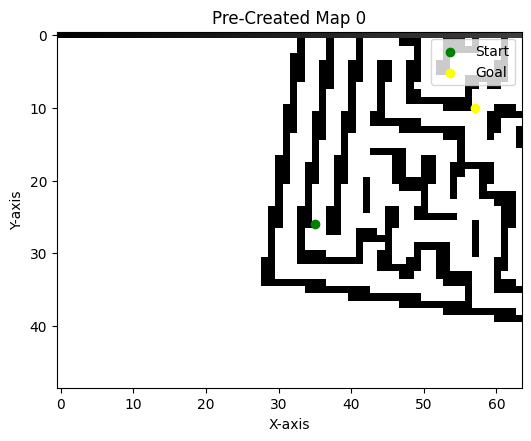

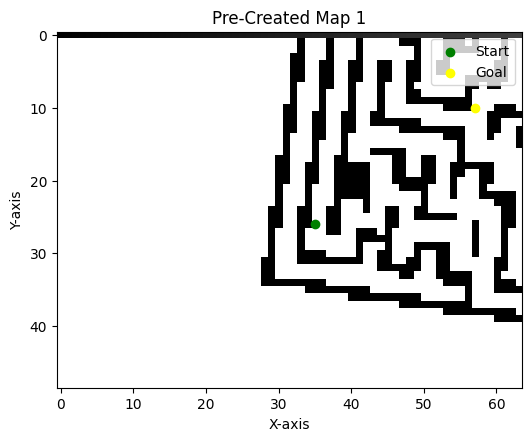

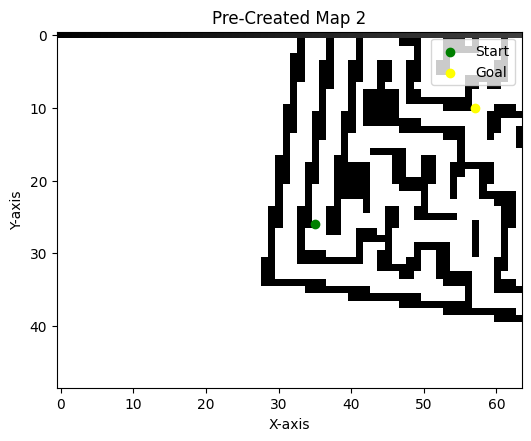

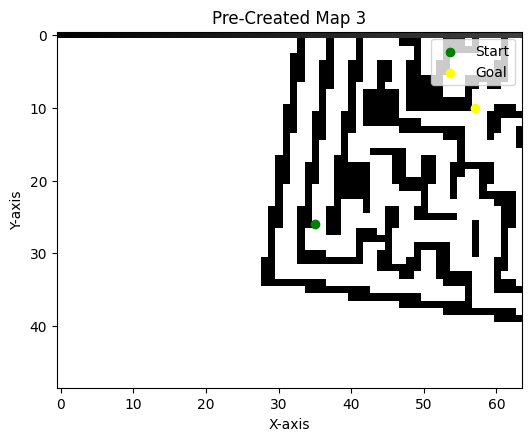

Initial plan stats: {'Expansions': 638, 'Vertex Updates': 4967, 'Time (s)': 0.07196521759033203, 'Path Length': 46}


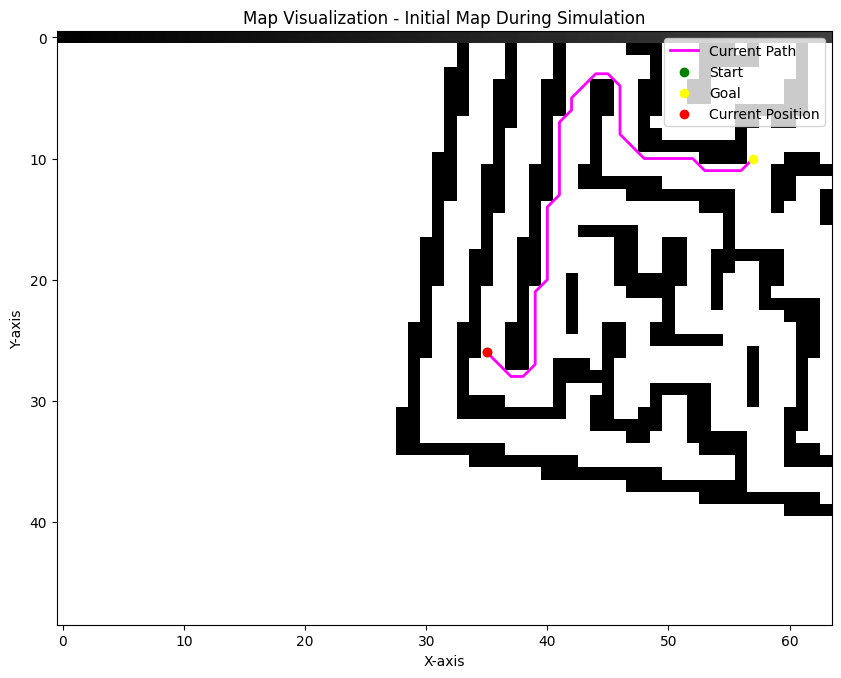

After 8 steps, switching to Map 1
Update stats after switching to Map 1: {'Expansions': 43, 'Vertex Updates': 502, 'Time (s)': 0.01510167121887207}


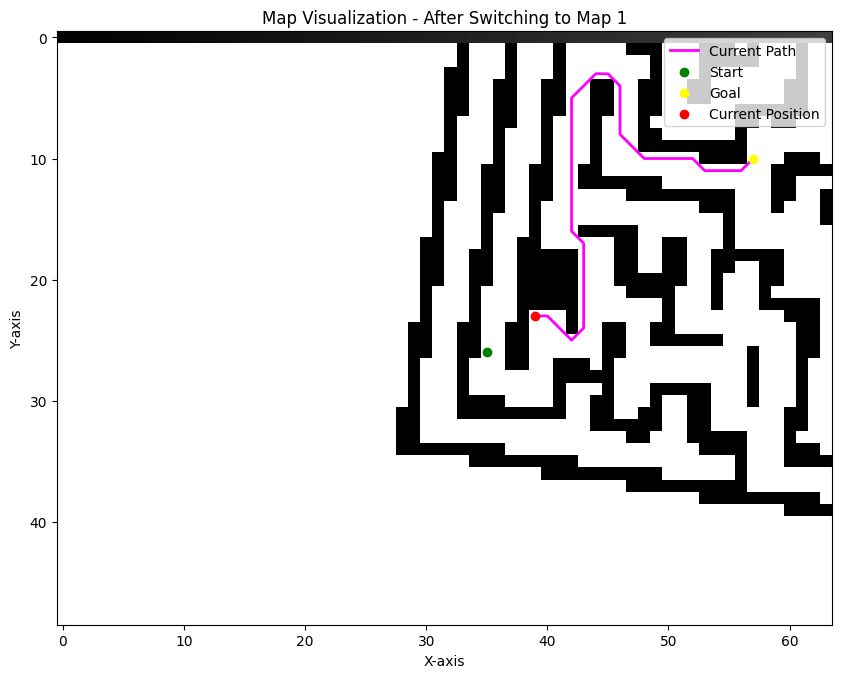

After 8 steps, switching to Map 2
Update stats after switching to Map 2: {'Expansions': 67, 'Vertex Updates': 721, 'Time (s)': 0.027421236038208008}


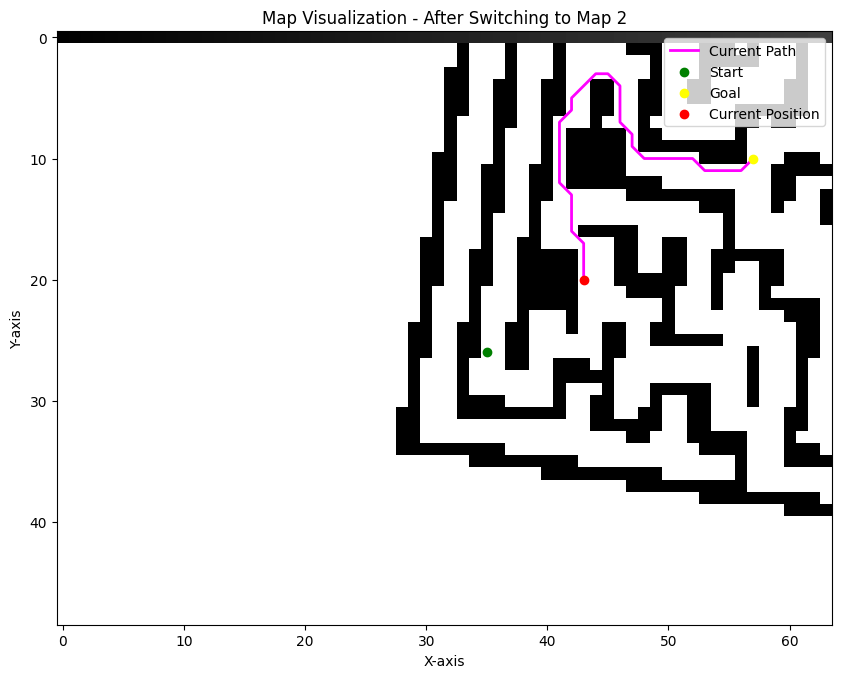

After 8 steps, switching to Map 3
Update stats after switching to Map 3: {'Expansions': 188, 'Vertex Updates': 1694, 'Time (s)': 0.08911728858947754}


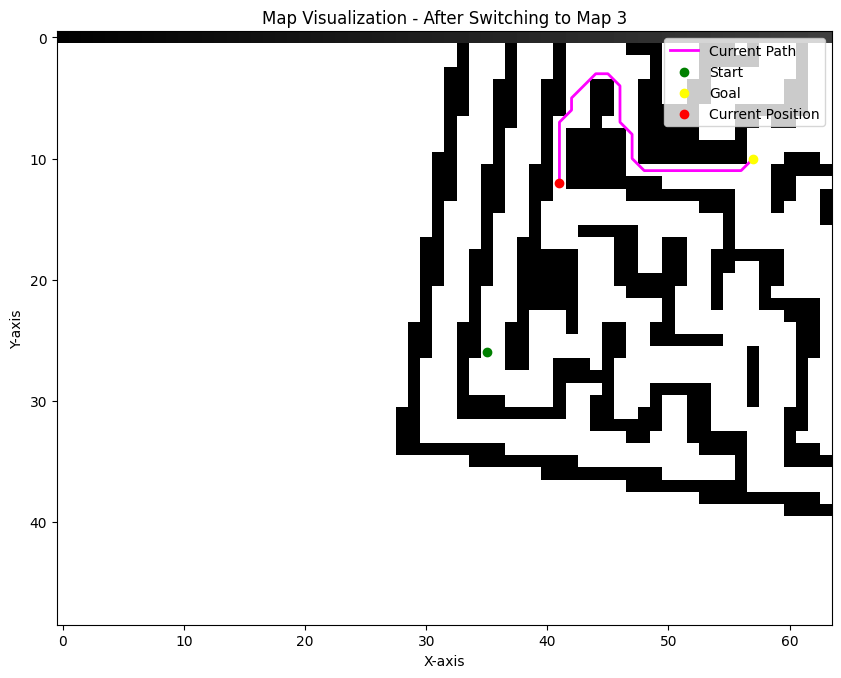

Simulation ended.


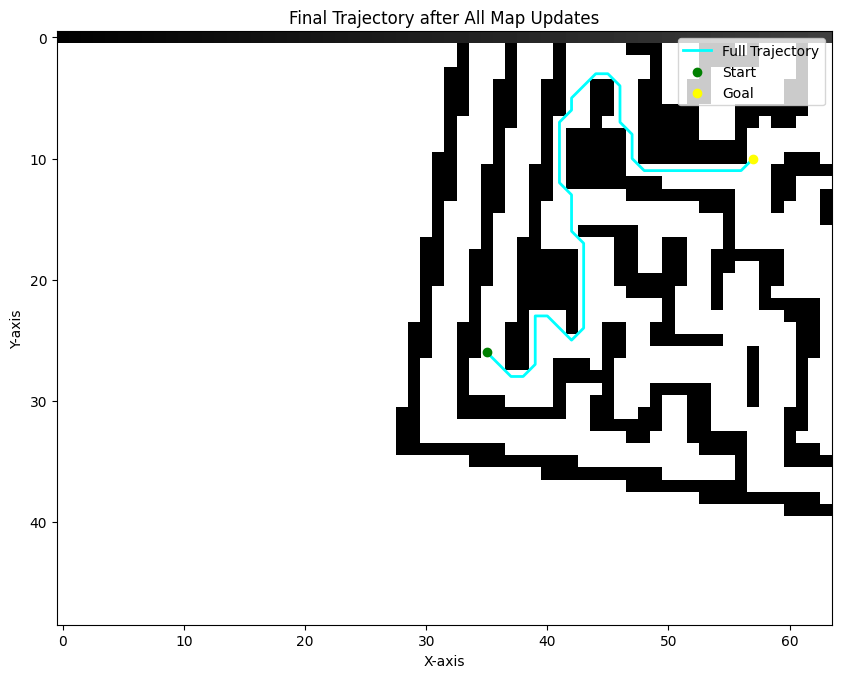

In [84]:
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
from math import inf
from heapq import heappop, heappush

class DStarLite:
    def __init__(self, map_array, start, goal):
        self.map = map_array
        self.rows, self.cols = map_array.shape
        self.start = start
        self.goal = goal
        self.km = 0
        self.s_last = start
        
        # Statistics
        self.expansions = 0
        self.vertex_updates = 0

        self.rhs = {}
        self.g = {}
        self.OPEN = []
        self.init_state()

    def init_state(self):
        for r in range(self.rows):
            for c in range(self.cols):
                self.rhs[(r,c)] = inf
                self.g[(r,c)] = inf
        self.rhs[self.goal] = 0
        self.insert(self.goal, self.calcKey(self.goal))

    def h(self, s):
        return abs(s[0]-self.goal[0]) + abs(s[1]-self.goal[1])

    def calcKey(self, s):
        return (min(self.g[s], self.rhs[s]) + self.h(self.start) + self.km, min(self.g[s], self.rhs[s]))

    def topKey(self):
        if not self.OPEN:
            return (inf, inf)
        return self.OPEN[0][0]

    def insert(self, s, key):
        heappush(self.OPEN, (key, s))

    def remove_from_open(self, u):
        tmp = []
        removed = False
        while self.OPEN:
            k, s = heappop(self.OPEN)
            if s == u and not removed:
                removed = True
                continue
            tmp.append((k,s))
        for item in tmp:
            heappush(self.OPEN, item)

    def updateVertex(self, u):
        self.vertex_updates += 1  # Count every vertex update
        if u != self.goal:
            neighbors = [succ for succ in self.get_neighbors(u) if self.is_passable(succ)]
            self.rhs[u] = min([self.g[succ] + 1 for succ in neighbors] or [inf])
        self.remove_from_open(u)
        if self.g[u] != self.rhs[u]:
            self.insert(u, self.calcKey(u))

    def computeShortestPath(self):
        start_time = time.time()
        self.expansions = 0  # Reset expansions count

        while True:
            tKey = self.topKey()
            sKey = self.calcKey(self.start)
            if not (tKey < sKey or self.g[self.start] != self.rhs[self.start]):
                break

            k, u = heappop(self.OPEN)
            self.expansions += 1  # Count expansions (each pop from OPEN)

            if k < self.calcKey(u):
                self.insert(u, self.calcKey(u))
            elif self.g[u] > self.rhs[u]:
                self.g[u] = self.rhs[u]
                for pred in self.get_neighbors(u):
                    self.updateVertex(pred)
            else:
                self.g[u] = inf
                self.updateVertex(u)
                for pred in self.get_neighbors(u):
                    self.updateVertex(pred)

        end_time = time.time()
        return end_time - start_time

    def get_neighbors(self, s):
        directions = [(0,1),(1,0),(0,-1),(-1,0),(1,1),(-1,-1),(1,-1),(-1,1)]
        nbrs = []
        for d in directions:
            nr, nc = s[0]+d[0], s[1]+d[1]
            if 0 <= nr < self.rows and 0 <= nc < self.cols:
                nbrs.append((nr, nc))
        return nbrs

    def is_passable(self, pos):
        return self.map[pos[0], pos[1]] == 255

    def get_path(self):
        if self.g[self.start] == inf:
            return []
        path = [self.start]
        current = self.start
        while current != self.goal:
            neighbors = [n for n in self.get_neighbors(current) if self.is_passable(n)]
            if not neighbors:
                return []
            current = min(neighbors, key=lambda x: self.g[x]+1 if self.g[x] != inf else inf)
            if self.g[current] == inf:
                return []
            path.append(current)
        return path

    def plan(self):
        self.vertex_updates = 0  # Reset vertex updates count before each plan
        self.km += self.h(self.s_last) - self.h(self.start)
        self.s_last = self.start
        duration = self.computeShortestPath()
        path = self.get_path()
        stats = {
            "Expansions": self.expansions,
            "Vertex Updates": self.vertex_updates,
            "Time (s)": duration,
            "Path Length": len(path)
        }
        return path, stats

    def move_start(self, new_start):
        self.km += self.h(self.start) - self.h(new_start)
        self.s_last = self.start
        self.start = new_start

    def update_map(self, changed_cells):
        self.vertex_updates = 0  # Reset for each update
        start_time = time.time()

        for cell in changed_cells:
            r, c = cell
            self.map[r, c] = 0  # now blocked
            affected_nodes = self.get_neighbors(cell) + [cell]
            for node in affected_nodes:
                self.updateVertex(node)

        duration = self.computeShortestPath()
        end_time = time.time()

        # Stats after update
        stats = {
            "Expansions": self.expansions,
            "Vertex Updates": self.vertex_updates,
            "Time (s)": duration
        }
        return stats

# ------------------------------------------
# Main Code: Pre-creating maps & Simulation
# ------------------------------------------

file_path = 'mp23(2).csv'
map_data = pd.read_csv(file_path, header=None)
initial_map = map_data.values

start_pos = (26, 35)
end_pos = (10, 57)

# Number of maps to create (including the initial)
num_maps = 4  # Initial + 3 more obstacle maps
N = 8  # After every 10 steps, switch to the next map

def create_new_map_with_obstacles(old_map, obstacle_center):
    # Add obstacles in a 5x5 area that moves each iteration
    new_map = old_map.copy()
    for rr in range(obstacle_center[0]-2, obstacle_center[0]+3):
        for cc in range(obstacle_center[1]-2, obstacle_center[1]+3):
            if 0 <= rr < new_map.shape[0] and 0 <= cc < new_map.shape[1]:
                new_map[rr, cc] = 0
    return new_map

# Pre-create all maps before execution
new_maps = [initial_map.copy()]
new_maps.append(create_new_map_with_obstacles(new_maps[-1], (20, 40)))
new_maps.append(create_new_map_with_obstacles(new_maps[-1], (10, 44)))
new_maps.append(create_new_map_with_obstacles(new_maps[-1], (8, 50)))

def visualize_map(map_array, path, current_pos, iteration_label):
    plt.figure(figsize=(10,8))
    plt.imshow(map_array, cmap='gray', origin='upper')
    if path:
        px, py = zip(*path)
        plt.plot(py, px, color='magenta', linewidth=2, label='Current Path')
    plt.scatter([start_pos[1]], [start_pos[0]], color='green', label='Start', zorder=5)
    plt.scatter([end_pos[1]], [end_pos[0]], color='yellow', label='Goal', zorder=5)
    plt.scatter([current_pos[1]], [current_pos[0]], color='red', label='Current Position', zorder=5)
    plt.title(f"Map Visualization - {iteration_label}")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.legend()
    plt.show()

# Visualize each pre-created map
for i, m in enumerate(new_maps):
    plt.figure(figsize=(6,5))
    plt.imshow(m, cmap='gray', origin='upper')
    plt.scatter([start_pos[1]], [start_pos[0]], color='green', label='Start', zorder=5)
    plt.scatter([end_pos[1]], [end_pos[0]], color='yellow', label='Goal', zorder=5)
    plt.title(f"Pre-Created Map {i}")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.legend()
    plt.show()

# Initialize the planner with the initial map
planner = DStarLite(new_maps[0].copy(), start_pos, end_pos)
path, stats = planner.plan()
print("Initial plan stats:", stats)
current_pos = start_pos
step_count = 0
full_trajectory = [current_pos]

visualize_map(planner.map, path, current_pos, "Initial Map During Simulation")

path_index = 1
current_map_index = 0

while current_pos != end_pos:
    if path_index >= len(path):
        print("No further steps in current path, cannot reach goal.")
        break

    current_pos = path[path_index]
    full_trajectory.append(current_pos)
    path_index += 1
    step_count += 1

    # After N steps, if we have another map
    if step_count == N and current_map_index < num_maps - 1:
        current_map_index += 1
        print(f"After {N} steps, switching to Map {current_map_index}")

        old_map = planner.map.copy()
        new_map = new_maps[current_map_index]
        diff = (old_map != new_map)
        changed_indices = np.where(diff)
        changed_cells = []
        for r, c in zip(changed_indices[0], changed_indices[1]):
            # Only consider cells changed from passable to blocked
            if old_map[r,c] == 255 and new_map[r,c] == 0:
                changed_cells.append((r,c))

        planner.move_start(current_pos)
        update_stats = planner.update_map(changed_cells)
        print(f"Update stats after switching to Map {current_map_index}:", update_stats)

        path = planner.get_path()
        if not path:
            print("No path found after switching maps.")
            visualize_map(planner.map, [], current_pos, f"No Path after Map {current_map_index}")
            break

        visualize_map(planner.map, path, current_pos, f"After Switching to Map {current_map_index}")

        # Reset step count and path index
        step_count = 0
        path_index = 1

print("Simulation ended.")

# Visualize the full trajectory on the last map
plt.figure(figsize=(10,8))
plt.imshow(planner.map, cmap='gray', origin='upper')
if full_trajectory:
    px, py = zip(*full_trajectory)
    plt.plot(py, px, color='cyan', linewidth=2, label='Full Trajectory')
plt.scatter([start_pos[1]], [start_pos[0]], color='green', label='Start', zorder=5)
plt.scatter([end_pos[1]], [end_pos[0]], color='yellow', label='Goal', zorder=5)
plt.title("Final Trajectory after All Map Updates")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.show()
